In [1]:
from networkx.readwrite import json_graph
import networkx as nx
import json
import matplotlib.pyplot as plt
import community as community_louvain

In [2]:
with open("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2011/Graph.json", 'rt') as gr:
    g = json.load(gr)

In [3]:
G = json_graph.node_link_graph(g)

In [4]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


In [5]:
# Print number of nodes and edges

In [4]:
print("Number of Nodes: ", len(G.nodes()))
print("Number of Edges: ", len(G.edges()))

Number of Nodes:  923
Number of Edges:  154636


In [7]:
#Degree calculation

In [8]:
for node_temp in G.nodes():
    wt = 0
    deg = 0
    for nbr, eattr in G.adj[node_temp].items():
        wt = wt + eattr['weight']
        deg += 1
    G.nodes[node_temp]['deg_wt'] = wt
    G.nodes[node_temp]['deg'] = deg

In [9]:
#Degree distrivution

Text(0, 0.5, 'Frequency')

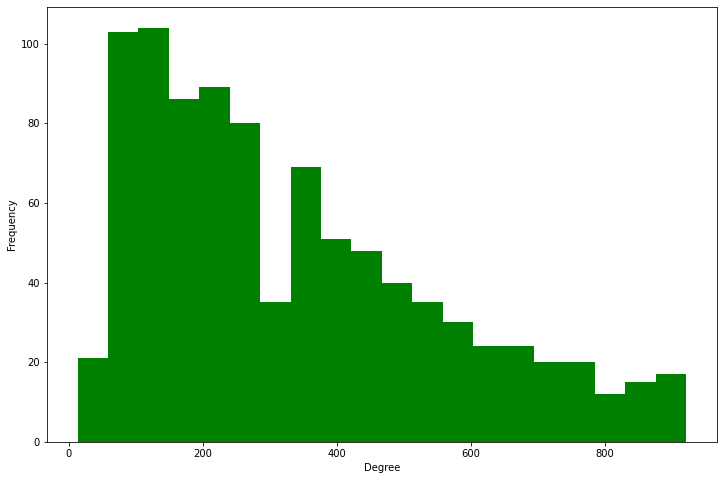

In [10]:
degree_freq = []
for nod in G.nodes:
    degree_freq.append(G.nodes[nod]['deg'])

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.hist(degree_freq, color='green', bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [11]:
# Weight Distribution

Text(0, 0.5, 'Frequency')

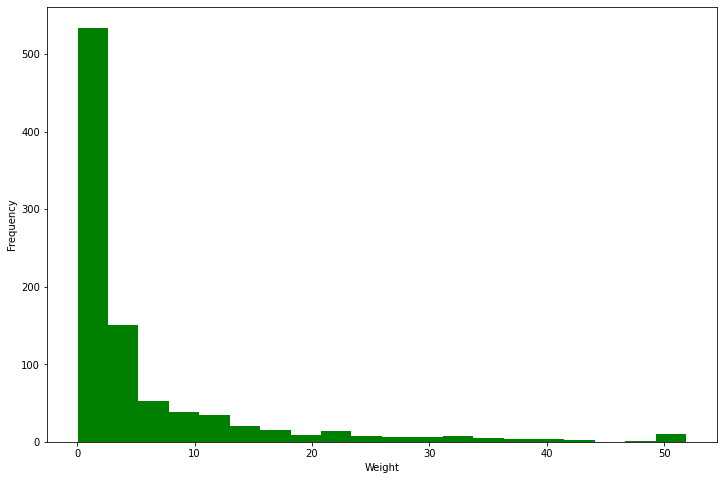

In [12]:
weight_freq = []
for nod in G.nodes:
    weight_freq.append(G.nodes[nod]['deg_wt'])

wt = range(len(weight_freq))
plt.figure(figsize=(12, 8))
plt.hist(weight_freq, color='green', bins=20)
plt.xlabel('Weight')
plt.ylabel('Frequency')

In [13]:
# Degree statistics

In [14]:
# Average degree
print(sum(degree_freq)/len(G.nodes))
print(min(degree_freq))
print(max(degree_freq))

335.07258938244854
13
922


In [15]:
# Weight Statistics
print(sum(weight_freq)/len(G.nodes))
print(min(weight_freq))
print(max(weight_freq))

5.503026269765493
0.01757631822386679
51.87789084181328


In [16]:
# sort nodes based on degree

In [17]:
degree_freq = {}
for nod in G.nodes:
    degree_freq[nod] = G.nodes[nod]['deg']
sorted_degree = dict(sorted(degree_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_degree)

{'self': 922, 'frames': 922, 'document': 922, 'location': 922, 'parent': 922, 'opener': 922, 'top': 922, 'name': 922, 'var': 922, 'window': 922, 'length': 914, 'null': 910, 'init': 900, 'true': 893, 'false': 886, 'type': 883, 'undefined': 879, 'getElementsByTagName': 875, 'replace': 870, 'src': 869, 'id': 866, 'body': 866, 'href': 864, 'createElement': 861, 'push': 860, 'navigator': 856, 'parentNode': 853, 'Date': 850, 'setTimeout': 848, 'appendChild': 845, 'width': 835, 'height': 833, 'join': 827, 'addEventListener': 825, 'style': 824, 'attachEvent': 823, 'getTime': 821, 'Math': 820, 'match': 819, 'string': 812, 'url': 811, 'userAgent': 795, 'onload': 795, 'prototype': 792, 'object': 785, 'none': 783, 'documentElement': 783, 'arguments': 777, 'event': 773, 'call': 771, 'readyState': 771, 'load': 768, 'insertBefore': 765, 'target': 765, 'innerHTML': 763, 'getElementById': 760, 'protocol': 760, 'display': 756, 'value': 755, 'function': 754, 'head': 752, 'className': 751, 'toString': 750

In [18]:
# sort nodes based on weight

In [19]:
weight_freq = {}
for nod in G.nodes:
    weight_freq[nod] = G.nodes[nod]['deg_wt']
sorted_weight = dict(sorted(weight_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_weight)

{'location': 51.87789084181328, 'window': 51.87789084181328, 'document': 51.87604070305288, 'var': 51.87234042553207, 'self': 51.826086956521905, 'name': 51.826086956521905, 'frames': 51.75393154486602, 'parent': 51.75393154486602, 'opener': 51.75393154486602, 'top': 51.75393154486602, 'length': 47.97224791859408, 'navigator': 43.81683626271989, 'src': 42.274745605920685, 'null': 39.9861239592971, 'Date': 39.58556891766903, 'width': 39.487511563367484, 'createElement': 39.309898242368284, 'height': 38.63644773358023, 'init': 36.867715078631036, 'Math': 36.648473635522784, 'appendChild': 36.403330249768835, 'getTime': 35.62627197039797, 'getElementsByTagName': 35.26456984273834, 'false': 34.77890841813146, 'true': 34.12488436632746, 'href': 33.77428307123057, 'push': 33.472710453284094, 'type': 33.26179463459768, 'undefined': 33.18038852913977, 'replace': 32.6512488436633, 'body': 31.80758556891787, 'match': 31.29232192414443, 'addEventListener': 31.286771507863268, 'style': 31.21554116

In [20]:
# Check whether the graph is connected

In [21]:
nx.is_connected(G)

True

In [22]:
# Clustering Coefficient

In [23]:
nx.average_clustering(G)

0.8298854377915853

In [24]:
# average_shortest_path_length

In [25]:
nx.average_shortest_path_length(G)

1.6365807056589494

In [26]:
#Lovain methof

In [27]:
partition = community_louvain.best_partition(G, resolution=0.88, weight='weight')

In [28]:
# number of partinions

In [29]:
num_of_partitions = len(set(partition.values()))
print(num_of_partitions)

10


In [30]:
api_hash_fract = {}
for key, value in partition.items():
    api_hash_fract[key] = value
louvain_clusters = {}
for i in range(num_of_partitions):
    clust = []
    for key, value in api_hash_fract.items():
        if value == i:
            clust.append(key)
    louvain_clusters[i] = clust
for i in range(num_of_partitions):
    print(len(louvain_clusters[i]))

82
152
247
76
143
24
14
15
151
19


In [31]:
with open("Lovain_clusters.json", 'w') as l:
    json.dump(louvain_clusters,l, indent=4)

